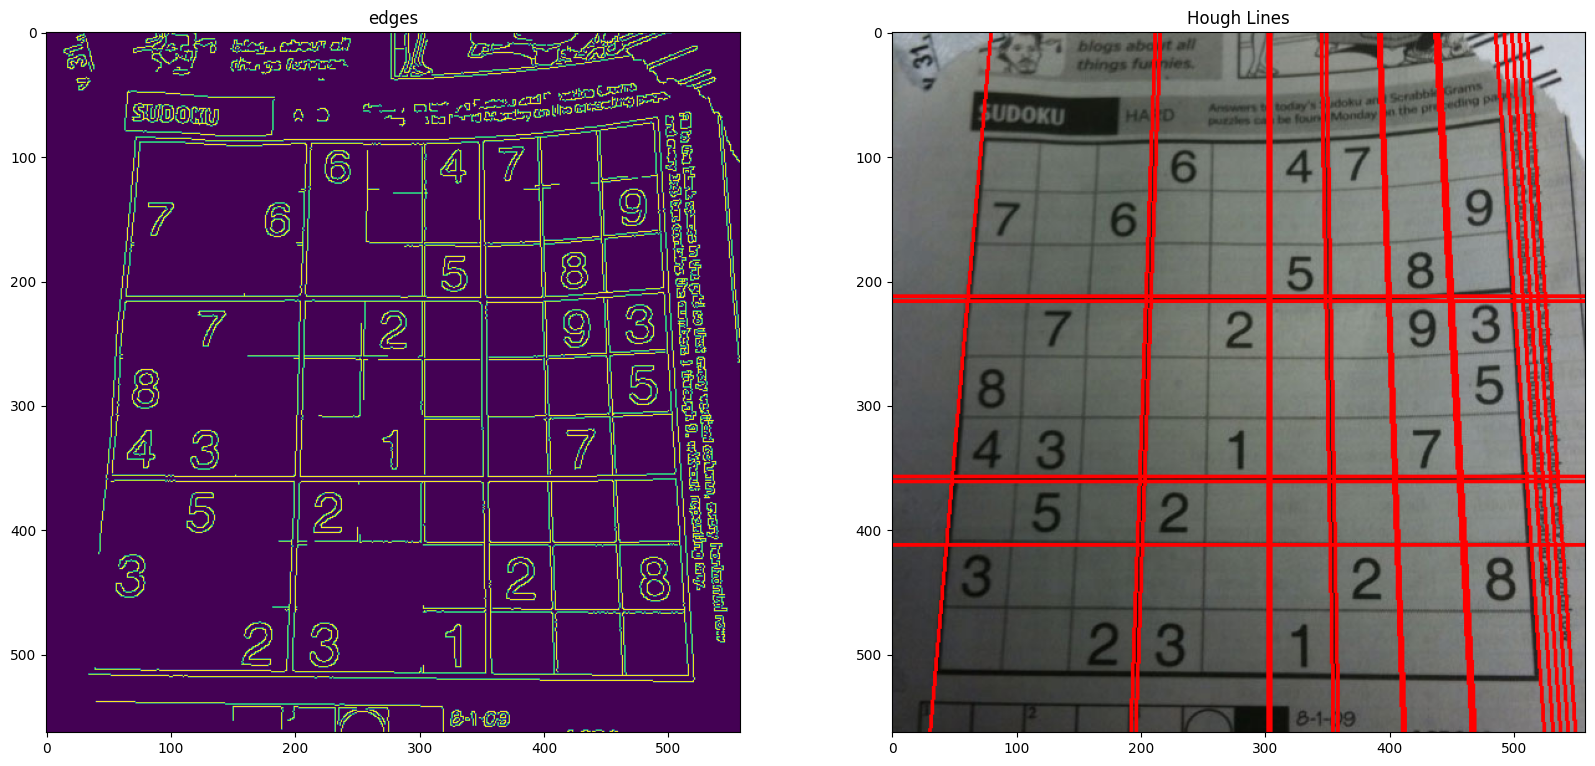

In [1]:
### 13.Line Detection - Using Hough Lines
### 13. 라인 감지 - 굵은 라인 사용
# cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
# 여기서 임계값은 라인으로 간주되는 최소 표

import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("../Examples/sudoku.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))

# 그레이스케일과 캐니 엣지 추출
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

plt.subplot(2,2,1)
plt.title("edges")
plt.imshow(edges)

# 1픽셀의 Rho 정확도를 사용하여 HoughLines 실행
# 1도인 np.pi / 180의 세타 정확도
# 라인 임계값은 240(라인 상의 포인트 수)으로 설정됩니다
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# 각 행을 반복하여 형식으로 변환
# cv.line에 의해 요구됨(즉, 끝점 필요)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)


plt.subplot(2, 2, 2)
plt.title("Hough Lines")
plt.imshow(image)